In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [5]:
path = os.getcwd() + '/Desktop/ex1data1.txt'
print path

/home/cal0x/Desktop/ex1data1.txt


In [6]:
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [7]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


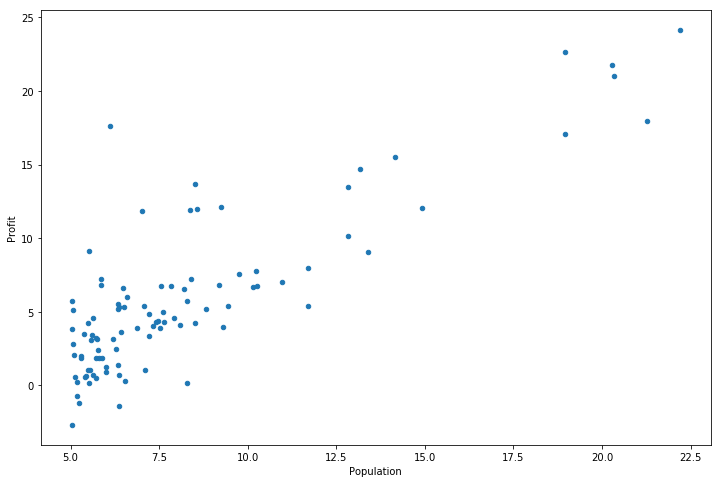

In [9]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))

In [10]:
def computecost(X, y, theta):
    inner = np.power(((X*theta.T) - y), 2)
    return np.sum(inner) / (2*len(X))

In [11]:
data.insert(0, 'Ones', 1)

In [12]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [13]:
cols = data.shape[1]

In [14]:
X = data.iloc[:,0 : cols-1]
y = data.iloc[:, cols-1 : cols]

In [15]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [16]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [117]:
computecost(X, y, theta)

32.072733877455676

In [128]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            
            temp[0, j] = theta[0, j] - ((alpha/len(X)))*np.sum(term)
            
        theta = temp
        cost[i] = computecost(X, y, theta)
        
    return theta, cost
        

In [136]:
alpha = 0.01
iters = 1000

In [137]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [138]:
computecost(X, y, g)

4.5159555030789118

In [145]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)

In [143]:
f = g[0, 0] + (g[0, 1]*x)

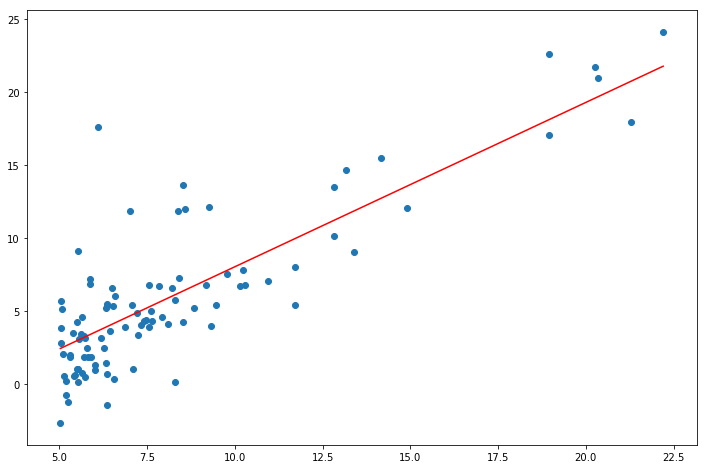

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')

In [17]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

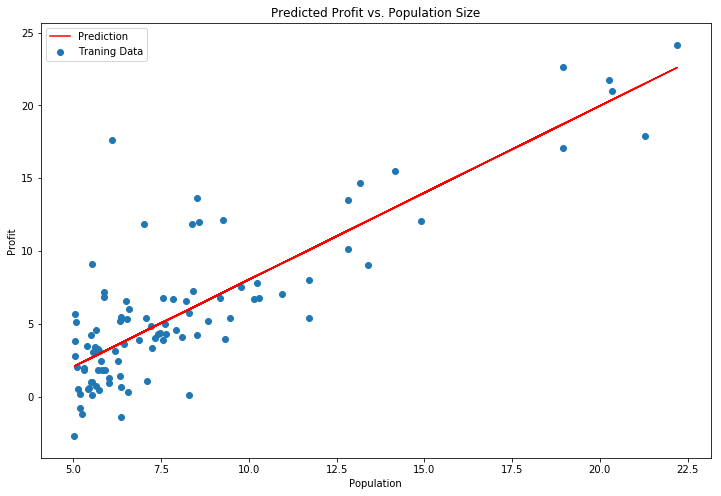

In [20]:
x = np.array(X[:, 1].A1)  
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

In [23]:
print np.array(X[:, 0].A1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]
